## JQData

In [3]:
from jqdatasdk import *
auth('17621158056','Zhouwy911911') #账号是申请时所填写的手机号；密码为聚宽官网登录密码

auth success 


In [11]:
df = get_price('000001.XSHE', 
               end_date='2021-05-30 14:00:00',
               count=1000, 
               frequency='daily', 
               fields=['open','close','high','low','volume','money'])

/Users/chinazhouwy/opt/anaconda3/envs/learn_ai/lib/python3.10/site-packages/jqdatasdk/api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


In [12]:
print(df)

             open  close   high    low      volume         money
2017-04-20   8.34   8.36   8.38   8.33  46700866.0  3.900635e+08
2017-04-21   8.36   8.41   8.42   8.34  34725324.0  2.911261e+08
2017-04-24   8.41   8.37   8.42   8.33  42151181.0  3.529264e+08
2017-04-25   8.37   8.43   8.44   8.37  40330450.0  3.392301e+08
2017-04-26   8.43   8.42   8.44   8.40  40780109.0  3.433161e+08
...           ...    ...    ...    ...         ...           ...
2021-05-24  23.48  23.48  23.60  23.19  34393563.0  8.060922e+08
2021-05-25  23.54  24.60  24.73  23.45  97237462.0  2.363146e+09
2021-05-26  24.64  25.01  25.12  24.50  91926378.0  2.286540e+09
2021-05-27  24.91  24.79  25.16  24.52  50409136.0  1.246712e+09
2021-05-28  24.68  24.50  24.71  24.16  49240073.0  1.200523e+09

[1000 rows x 6 columns]


In [18]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [27]:
df['range'] = round(100 * (df['close'] - df['open'])/df['open'],2)

In [28]:
print(df)

             open  close   high    low      volume         money  range
2017-04-20   8.34   8.36   8.38   8.33  46700866.0  3.900635e+08   0.24
2017-04-21   8.36   8.41   8.42   8.34  34725324.0  2.911261e+08   0.60
2017-04-24   8.41   8.37   8.42   8.33  42151181.0  3.529264e+08  -0.48
2017-04-25   8.37   8.43   8.44   8.37  40330450.0  3.392301e+08   0.72
2017-04-26   8.43   8.42   8.44   8.40  40780109.0  3.433161e+08  -0.12
...           ...    ...    ...    ...         ...           ...    ...
2021-05-24  23.48  23.48  23.60  23.19  34393563.0  8.060922e+08   0.00
2021-05-25  23.54  24.60  24.73  23.45  97237462.0  2.363146e+09   4.50
2021-05-26  24.64  25.01  25.12  24.50  91926378.0  2.286540e+09   1.50
2021-05-27  24.91  24.79  25.16  24.52  50409136.0  1.246712e+09  -0.48
2021-05-28  24.68  24.50  24.71  24.16  49240073.0  1.200523e+09  -0.73

[1000 rows x 7 columns]


In [13]:
import pandas as pd

In [34]:
 df.to_csv('000001.XSHE.csv',index_label='Date');

In [36]:
data = pd.read_csv('000001.XSHE.csv')
data.head()

,Date,open,close,high,low,volume,money,range
0,2017-04-20,8.34,8.36,8.38,8.33,46700866.0,3.900635e+08,0.24
1,2017-04-21,8.36,8.41,8.42,8.34,34725324.0,2.911261e+08,0.60
2,2017-04-24,8.41,8.37,8.42,8.33,42151181.0,3.529264e+08,-0.48
3,2017-04-25,8.37,8.43,8.44,8.37,40330450.0,3.392301e+08,0.72
4,2017-04-26,8.43,8.42,8.44,8.40,40780109.0,3.433161e+08,-0.12


In [44]:
x_multi = data.drop(['range','Date'],axis=1)
print(x_multi)

      open  close   high    low      volume         money
0     8.34   8.36   8.38   8.33  46700866.0  3.900635e+08
1     8.36   8.41   8.42   8.34  34725324.0  2.911261e+08
2     8.41   8.37   8.42   8.33  42151181.0  3.529264e+08
3     8.37   8.43   8.44   8.37  40330450.0  3.392301e+08
4     8.43   8.42   8.44   8.40  40780109.0  3.433161e+08
..     ...    ...    ...    ...         ...           ...
995  23.48  23.48  23.60  23.19  34393563.0  8.060922e+08
996  23.54  24.60  24.73  23.45  97237462.0  2.363146e+09
997  24.64  25.01  25.12  24.50  91926378.0  2.286540e+09
998  24.91  24.79  25.16  24.52  50409136.0  1.246712e+09
999  24.68  24.50  24.71  24.16  49240073.0  1.200523e+09

[1000 rows x 6 columns]


In [41]:
y = data.loc[:,'range']
print(y)

0      0.24
1      0.60
2     -0.48
3      0.72
4     -0.12
       ... 
995    0.00
996    4.50
997    1.50
998   -0.48
999   -0.73
Name: range, Length: 1000, dtype: float64


In [45]:
from sklearn.linear_model import LinearRegression
LR_multi = LinearRegression()
LR_multi.fit(x_multi,y)

LinearRegression()

In [72]:
print(x_multi)
print(type(x_multi))

y_predict_multi = LR_multi.predict(x_multi)
# print(y_predict_multi)

      open  close   high    low      volume         money
0     8.34   8.36   8.38   8.33  46700866.0  3.900635e+08
1     8.36   8.41   8.42   8.34  34725324.0  2.911261e+08
2     8.41   8.37   8.42   8.33  42151181.0  3.529264e+08
3     8.37   8.43   8.44   8.37  40330450.0  3.392301e+08
4     8.43   8.42   8.44   8.40  40780109.0  3.433161e+08
..     ...    ...    ...    ...         ...           ...
995  23.48  23.48  23.60  23.19  34393563.0  8.060922e+08
996  23.54  24.60  24.73  23.45  97237462.0  2.363146e+09
997  24.64  25.01  25.12  24.50  91926378.0  2.286540e+09
998  24.91  24.79  25.16  24.52  50409136.0  1.246712e+09
999  24.68  24.50  24.71  24.16  49240073.0  1.200523e+09

[1000 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>


In [48]:
from sklearn.metrics import mean_squared_error,r2_score
MSE_multi = mean_squared_error(y,y_predict_multi)
R2_multi = r2_score(y,y_predict_multi)
print(MSE_multi,R2_multi)

0.27829483209245326 0.9254773869868289


In [63]:
# 斜率
a = LR_multi.coef_
# 截距
b = LR_multi.intercept_
print(a,b)

[-6.52245887e+00  6.54262249e+00  1.62174937e-02  8.32679836e-03
  9.30144618e-09 -5.95697713e-10] -0.7149599380972194


In [75]:
pd.DataFrame(np.array([24.68,24.50,24.71,24.16,49240073.0,1.200523e+09]).reshape(-1,1)) #字典
# print(np.array([24.68,24.50,24.71,24.16,49240073.0,1.200523e+09]).reshape(-1,1))

,0
0,2.468000e+01
1,2.450000e+01
2,2.471000e+01
3,2.416000e+01
4,4.924007e+07
5,1.200523e+09


In [77]:
import numpy as np
y_predict_multi_tomorrow = LR_multi.predict([[24.68,24.50,24.71,24.16,49240073.0,1.200523e+09]])
print(y_predict_multi_tomorrow)

[-1.05022907]


/Users/chinazhouwy/opt/anaconda3/envs/learn_ai/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


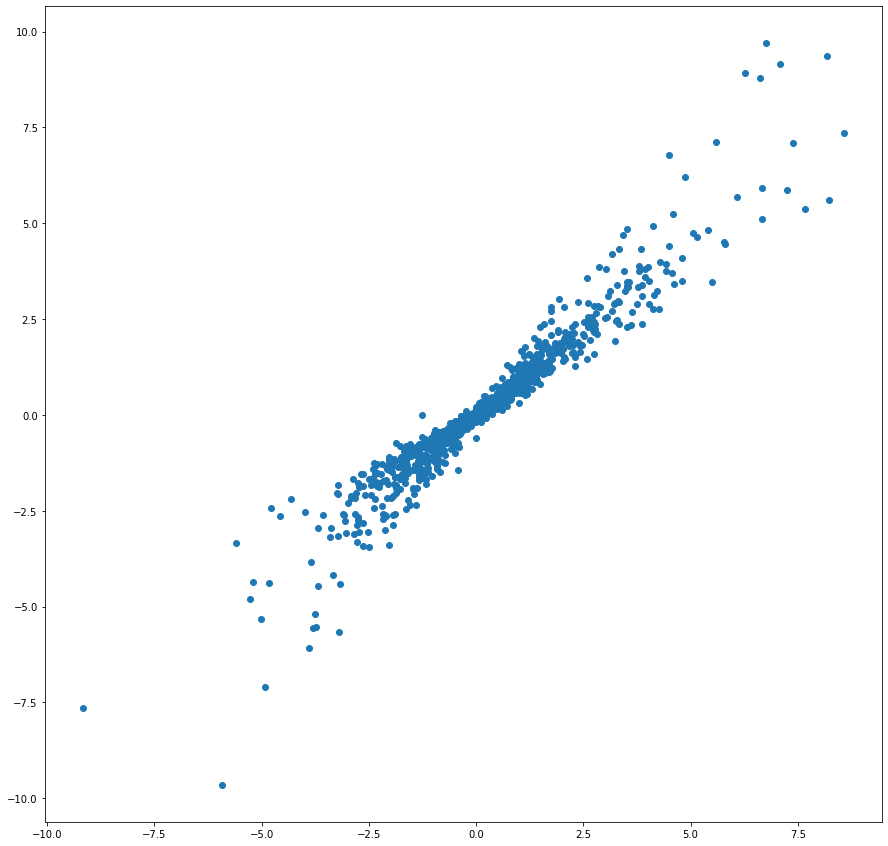

In [61]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(y,y_predict_multi,cmap='Red')